# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")
import tensorflow as tf


In [2]:
pal = ["#395e66","#387d7a","#32936f","#26a96c","#2bc016"]

In [3]:
data = pd.read_csv("survey_lung_cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,1,2,2,2,1,2,YES


# Data Cleaning

In [4]:
data=data.drop(["ANXIETY","PEER_PRESSURE"],axis=1)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,1,2,2,2,2,2,2,YES
1,M,74,2,1,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,1,2,1,2,2,1,2,NO
3,M,63,2,2,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,2,1,2,2,1,1,NO


In [5]:
data=pd.DataFrame(data)
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,1,2,2,2,2,2,2,YES
1,M,74,2,1,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,1,2,1,2,2,1,2,NO
3,M,63,2,2,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,1,2,1,2,2,2,1,2,YES


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   CHRONIC DISEASE        309 non-null    int64 
 5   ALLERGY                309 non-null    int64 
 6   WHEEZING               309 non-null    int64 
 7   ALCOHOL CONSUMING      309 non-null    int64 
 8   COUGHING               309 non-null    int64 
 9   SHORTNESS OF BREATH    309 non-null    int64 
 10  SWALLOWING DIFFICULTY  309 non-null    int64 
 11  CHEST PAIN             309 non-null    int64 
 12  LUNG_CANCER            309 non-null    object
dtypes: int64(11), object(2)
memory usage: 31.5+ KB


# Data Summery

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
COUGHING,309.0,1.579288,0.494474,1.0,1.0,2.0,2.0,2.0
SHORTNESS OF BREATH,309.0,1.640777,0.480551,1.0,1.0,2.0,2.0,2.0
SWALLOWING DIFFICULTY,309.0,1.469256,0.499863,1.0,1.0,1.0,2.0,2.0


In [8]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
CHRONIC DISEASE          0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [10]:
data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [11]:
data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})

data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [12]:
print ('Total Healthy Patients : {} '.format(data.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(data.LUNG_CANCER.value_counts()[1]))

Total Healthy Patients : 39 
Total Suspected Patients : 270 


# Grouping the Variables into Regressor Variables and Response Variables

In [13]:


X = data.drop("LUNG_CANCER",axis=1)
X.head()
X.count()

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
CHRONIC DISEASE          309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
dtype: int64

In [14]:

y = data["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [15]:
# Adding randomized samples to the data as the data is imbalanced

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X, y = over_samp.fit_resample(X, y)
X.shape, y.shape

((540, 12), (540,))

# Training The model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_test1=X_test
X_test1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,CHRONIC DISEASE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
229,1,57,1,1,2,2,1,2,2,2,2,2
73,0,60,2,1,2,1,1,1,1,2,1,1
521,1,55,2,1,1,2,1,1,1,2,1,2
86,1,66,1,2,2,2,1,2,2,2,1,2
469,0,60,1,2,1,1,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
498,0,57,1,2,1,1,1,1,2,1,1,1
148,1,70,2,1,1,2,2,2,2,2,1,2
46,1,62,2,2,2,2,1,1,2,2,2,2
93,0,59,1,2,2,2,2,2,2,2,2,1


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc=rfc.fit(X_train,y_train)
rfc



RandomForestClassifier()

In [20]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 99.07407407407408


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


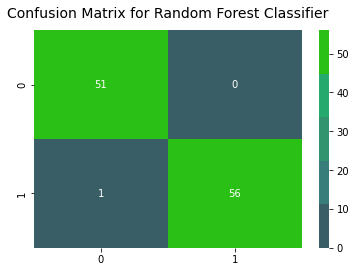

In [21]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [23]:
Sensitivity=56/(56)
Specificity=51/(51+1)
print("The Sensitivity is",Sensitivity,"\nThe specificity is ",Specificity)

The Sensitivity is 1.0 
The specificity is  0.9807692307692307


# Predictions

In [24]:
Y_pred1 = rfc.predict(X_test)
Y_pred1

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

# K Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 91.66666666666666


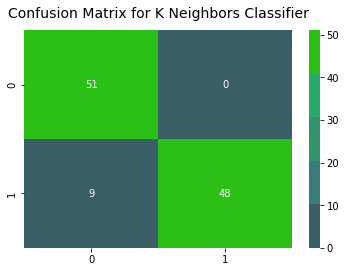

In [27]:
y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [28]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.84      0.91        57

    accuracy                           0.92       108
   macro avg       0.93      0.92      0.92       108
weighted avg       0.93      0.92      0.92       108



In [29]:
Sensitivity2=48/(48+1)
Specificity2=51/(51+9)
print("The Sensitivity is",Sensitivity2,"\nThe specificity is ",Specificity2)

The Sensitivity is 0.9795918367346939 
The specificity is  0.85


In [30]:
Y_pred2 = knn.predict(X_test)
Y_pred2

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 96.29629629629629


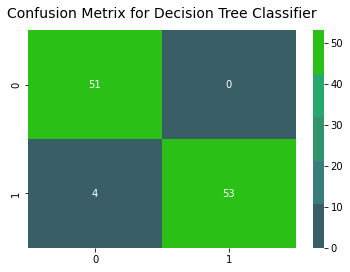

In [33]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [34]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



In [35]:
Sensitivity3=53/(53)
Specificity3=51/(51+4)
print("The Sensitivity is",Sensitivity3,"\nThe specificity is ",Specificity3)


The Sensitivity is 1.0 
The specificity is  0.9272727272727272


In [36]:
Y_pred3 = dtc.predict(X_test)
Y_pred3

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

# Predictions

In [40]:
X_test

array([[ 1.07703296, -0.6508234 , -1.11280815, ...,  0.80942721,
         1.45186558,  1.1446224 ],
       [-0.92847669, -0.28536971,  0.8986275 , ...,  0.80942721,
        -0.688769  , -0.87365056],
       [ 1.07703296, -0.8944592 ,  0.8986275 , ...,  0.80942721,
        -0.688769  ,  1.1446224 ],
       ...,
       [ 1.07703296, -0.04173391,  0.8986275 , ...,  0.80942721,
         1.45186558,  1.1446224 ],
       [-0.92847669, -0.4071876 , -1.11280815, ...,  0.80942721,
         1.45186558, -0.87365056],
       [-0.92847669, -0.6508234 ,  0.8986275 , ...,  0.80942721,
        -0.688769  , -0.87365056]])

# Predicting by taking values from User:

In [41]:

    

features = ['GENDER','AGE','SMOKING','YELLOW_FINGERS','CHRONIC DISEASE','ALLERGY','WHEEZING','ALCOHOLIC CONSUMPTION','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']

len(features)



    



12

In [42]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor = regressor.fit(X, y)

In [ ]:
c=[]
print('Please answer as prompted:',)
for i in features:
    a=int(input(i))
    c.append(a)
    

Please answer as prompted:


In [ ]:
print('The lis to your given response is',c)

In [ ]:
a=np.array(c)
print('Array form c is',a)
b= a.reshape(1,-1)
print('Two dimensional form of vector a is', b)

In [ ]:
Y_pred = regressor.predict(b)
Y_pred

In [ ]:
if Y_pred==1:
    print("This person is more prone to  have a lung cancer.")
else:
    print("This person does not have a lung cancer")
        